In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import datetime
from datetime import datetime, date

In [3]:
# format display
pd.set_option('display.max_columns',12)
pd.set_option('display.max_rows',10)
pd.set_option('display.width',120)

In [4]:
# read dataset, formatting Date col as a Date

In [5]:
data = pd.read_csv("prices10.csv",parse_dates=['Date'])
date

datetime.date

In [6]:
data[:5]

,Date,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
0,2007-01-03,80.10,55.48,85.07,62.22,185.03,74.52,46.73,27.20,83.93
1,2007-01-04,81.88,54.94,85.98,61.06,183.30,74.82,45.92,27.53,84.54
2,2007-01-05,81.29,55.15,85.20,61.49,183.49,74.50,46.31,28.02,84.94
3,2007-01-08,81.69,55.86,86.50,61.00,187.80,74.32,45.70,28.61,85.84
4,2007-01-09,88.48,55.21,87.52,60.53,188.12,73.54,45.39,28.55,86.34


In [7]:
# remove column Date -save it to a Date_col

In [8]:
Date_col = data.pop('Date')

In [9]:
data[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
0,80.10,55.48,85.07,62.22,185.03,74.52,46.73,27.20,83.93
1,81.88,54.94,85.98,61.06,183.30,74.82,45.92,27.53,84.54
2,81.29,55.15,85.20,61.49,183.49,74.50,46.31,28.02,84.94
3,81.69,55.86,86.50,61.00,187.80,74.32,45.70,28.61,85.84
4,88.48,55.21,87.52,60.53,188.12,73.54,45.39,28.55,86.34


In [10]:
Date_col[:5]

0   2007-01-03
1   2007-01-04
2   2007-01-05
3   2007-01-08
4   2007-01-09
Name: Date, dtype: datetime64[ns]

In [11]:
#keep a copy

In [12]:
close_px = data.copy()

In [13]:
close_px.index = Date_col
close_px[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
Date,,,,,,,,,
2007-01-03,80.10,55.48,85.07,62.22,185.03,74.52,46.73,27.20,83.93
2007-01-04,81.88,54.94,85.98,61.06,183.30,74.82,45.92,27.53,84.54
2007-01-05,81.29,55.15,85.20,61.49,183.49,74.50,46.31,28.02,84.94
2007-01-08,81.69,55.86,86.50,61.00,187.80,74.32,45.70,28.61,85.84
2007-01-09,88.48,55.21,87.52,60.53,188.12,73.54,45.39,28.55,86.34


# plotting time series prices

In [14]:
#plot AAPL prices

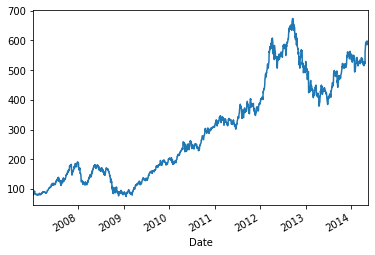

In [15]:
close_px.AAPL.plot()

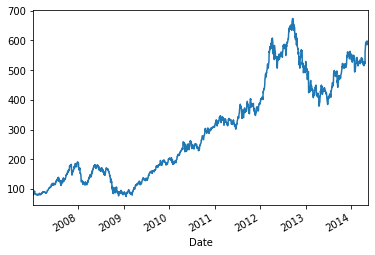

In [16]:
close_px['AAPL'].plot()

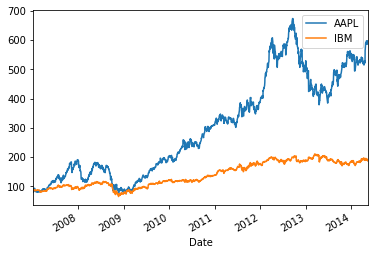

In [17]:
close_px[["AAPL","IBM"]].plot()

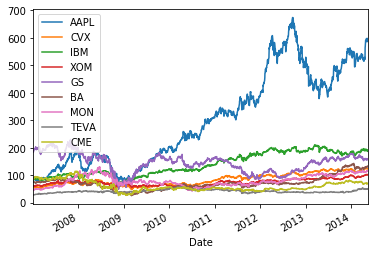

In [18]:
close_px.plot()

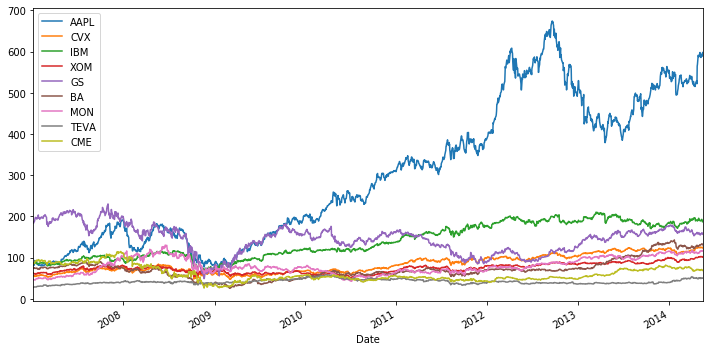

In [19]:
close_px.plot(figsize=(12,6))

# net returns

In [20]:
net_returns = data/data.shift(1)-1
net_returns[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.022222,-0.009733,0.010697,-0.018644,-0.009350,0.004026,-0.017334,0.012132,0.007268
2,-0.007206,0.003822,-0.009072,0.007042,0.001037,-0.004277,0.008493,0.017799,0.004731
3,0.004921,0.012874,0.015258,-0.007969,0.023489,-0.002416,-0.013172,0.021056,0.010596
4,0.083119,-0.011636,0.011792,-0.007705,0.001704,-0.010495,-0.006783,-0.002097,0.005825


In [21]:
# add dates to net_returns

In [22]:
daily_pc = net_returns.copy()

In [23]:
daily_pc.index = Date_col

In [24]:
# plot of daily returns

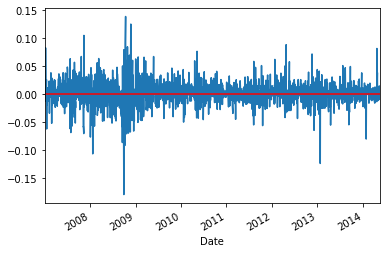

In [25]:
daily_pc['AAPL'].plot()
plt.axhline(color='r')

In [26]:
# daily cumulative returns

In [27]:
cum_returns = (1+net_returns).cumprod()
cum_returns[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.022222,0.990267,1.010697,0.981356,0.990650,1.004026,0.982666,1.012132,1.007268
2,1.014856,0.994052,1.001528,0.988267,0.991677,0.999732,0.991012,1.030147,1.012034
3,1.019850,1.006849,1.016810,0.980392,1.014971,0.997316,0.977958,1.051838,1.022757
4,1.104619,0.995133,1.028800,0.972838,1.016700,0.986849,0.971325,1.049632,1.028714


In [28]:
daily_cr = cum_returns.copy()

In [29]:
daily_cr.index = Date_col
daily_cr[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
Date,,,,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,1.022222,0.990267,1.010697,0.981356,0.990650,1.004026,0.982666,1.012132,1.007268
2007-01-05,1.014856,0.994052,1.001528,0.988267,0.991677,0.999732,0.991012,1.030147,1.012034
2007-01-08,1.019850,1.006849,1.016810,0.980392,1.014971,0.997316,0.977958,1.051838,1.022757
2007-01-09,1.104619,0.995133,1.028800,0.972838,1.016700,0.986849,0.971325,1.049632,1.028714


In [30]:
# plot cumulative returns

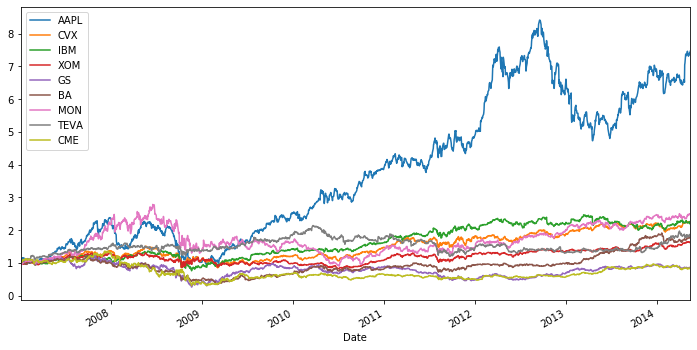

In [31]:
daily_cr.plot(figsize=(12,6))

# distribution of net return

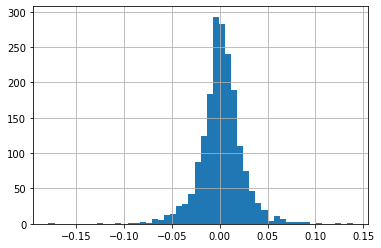

In [32]:
aapl = daily_pc['AAPL']
aapl.hist(bins=50)

In [33]:
import seaborn as sns

In [34]:
net_returns[1:]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
1,0.022222,-0.009733,0.010697,-0.018644,-0.009350,0.004026,-0.017334,0.012132,0.007268
2,-0.007206,0.003822,-0.009072,0.007042,0.001037,-0.004277,0.008493,0.017799,0.004731
3,0.004921,0.012874,0.015258,-0.007969,0.023489,-0.002416,-0.013172,0.021056,0.010596
4,0.083119,-0.011636,0.011792,-0.007705,0.001704,-0.010495,-0.006783,-0.002097,0.005825
5,0.047807,-0.017207,-0.011769,-0.015364,0.019775,0.014414,-0.007050,0.002452,0.028608
...,...,...,...,...,...,...,...,...,...
1851,0.012450,0.001694,0.013100,0.002746,0.014949,0.011442,0.002680,0.014925,0.018968
1852,0.001569,0.004832,-0.001973,0.001272,0.004575,0.006410,0.008106,0.024376,-0.004513
1853,0.000185,0.004568,-0.018055,-0.000684,-0.005178,-0.003447,0.000770,-0.013176,-0.011050
1854,-0.008504,-0.012286,-0.011975,-0.014762,-0.017623,-0.013384,-0.013675,-0.009167,-0.004727


In [37]:
sns.destplot(net_returns.AAPL[1:])

AttributeError: module 'seaborn' has no attribute 'destplot'

# scatterplot matrix of all stocks daily changes

In [38]:
daily.pc.hist(bins=50,figsize=(12,6));

NameError: name 'daily' is not defined

# moving averages

In [ ]:
aapl[:9]

In [ ]:
aapl_close = close_px.AAPL
aapl_close[:5]

In [ ]:
# 30days moving average

In [ ]:
ma_30 = aapl_close.rolling(window=30).mean()

In [ ]:
ma_30[:9]

In [ ]:
ma_30[:45]

In [ ]:
#90-day moving average

In [ ]:
ma_90 = aapl_close.rolling(window=90).mean()

In [ ]:
type(ma_90)

In [ ]:
#empty data frame

In [ ]:
df2 = pd.DataFrame()

In [ ]:
df2['Prince'] = aapl_close

In [ ]:
df2[:5]

In [ ]:
df2['30 days'] = ma_30

In [ ]:
df2['90 days'] = ma_90

In [ ]:
df2.plot(figsize=(12,8))
plt.grid()

# Comparison of avarage daily returns across stocks

In [ ]:
# scatterplot of price changes of IBM vs AAPL

In [ ]:
plt.scatter(daily_pc['IBM'], daily_pc["AAPL"],s=3)
plt.xlabel('IBM')
plt.ylabel('AAPL')
plt.grid()

In [ ]:
# sns adds a regression line

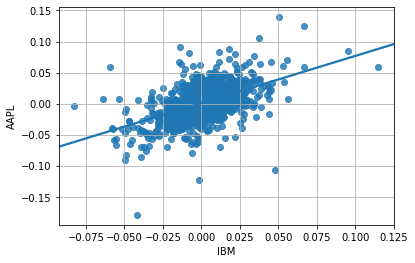

In [39]:
sns.regplot('IBM','AAPL',daily_pc,ci=None)
plt.grid()

In [41]:
#reduce dots size
sns.regplot('IBM',"AAPL", daily_pc.scatter_kws={'s':3},ci=None)
plt.grid()

SyntaxError: keyword can't be an expression (<ipython-input-41-81a2c52408a5>, line 2)